<a href="https://colab.research.google.com/github/spatino1234/Brain-Tumor-Classifier/blob/main/Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

print("|  i <3 my gf  |")


|  i <3 my gf  |


In [2]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 98% 146M/149M [00:03<00:00, 51.0MB/s]
100% 149M/149M [00:03<00:00, 45.5MB/s]


In [ ]:
def get_class_paths(path):
    classes = []
    class_paths = []

    # Iterate through directories in the training path
    for label in os.listdir(path):
        label_path = os.path.join(path, label)

        # Check if it's a directory
        if os.path.isdir(label_path):
            # Iterate through images in the label directory
            for image in os.listdir(label_path):
                image_path = os.path.join(label_path, image)

                # Add class and path to respective lists
                classes.append(label)
                class_paths.append(image_path)

    # Create a DataFrame with the collected data
    df = pd.DataFrame({
        'Class Path': class_paths,
        'Class': classes
    })

    return df


In [ ]:
tr_df = get_class_paths("/content/Training")
tr_df

,Class Path,Class
0,/content/Training/pituitary/Tr-pi_0140.jpg,pituitary
1,/content/Training/pituitary/Tr-pi_0514.jpg,pituitary
2,/content/Training/pituitary/Tr-pi_0311.jpg,pituitary
3,/content/Training/pituitary/Tr-pi_1174.jpg,pituitary
4,/content/Training/pituitary/Tr-pi_0594.jpg,pituitary
...,...,...
5707,/content/Training/glioma/Tr-gl_0436.jpg,glioma
5708,/content/Training/glioma/Tr-gl_0859.jpg,glioma
5709,/content/Training/glioma/Tr-gl_0753.jpg,glioma
5710,/content/Training/glioma/Tr-gl_0733.jpg,glioma


In [ ]:
ts_df = get_class_paths("/content/Testing")
ts_df

,Class Path,Class
0,/content/Testing/pituitary/Te-pi_0064.jpg,pituitary
1,/content/Testing/pituitary/Te-pi_0132.jpg,pituitary
2,/content/Testing/pituitary/Te-pi_0059.jpg,pituitary
3,/content/Testing/pituitary/Te-pi_0099.jpg,pituitary
4,/content/Testing/pituitary/Te-pi_0040.jpg,pituitary
...,...,...
1306,/content/Testing/glioma/Te-gl_0169.jpg,glioma
1307,/content/Testing/glioma/Te-gl_0271.jpg,glioma
1308,/content/Testing/glioma/Te-gl_0206.jpg,glioma
1309,/content/Testing/glioma/Te-gl_0085.jpg,glioma


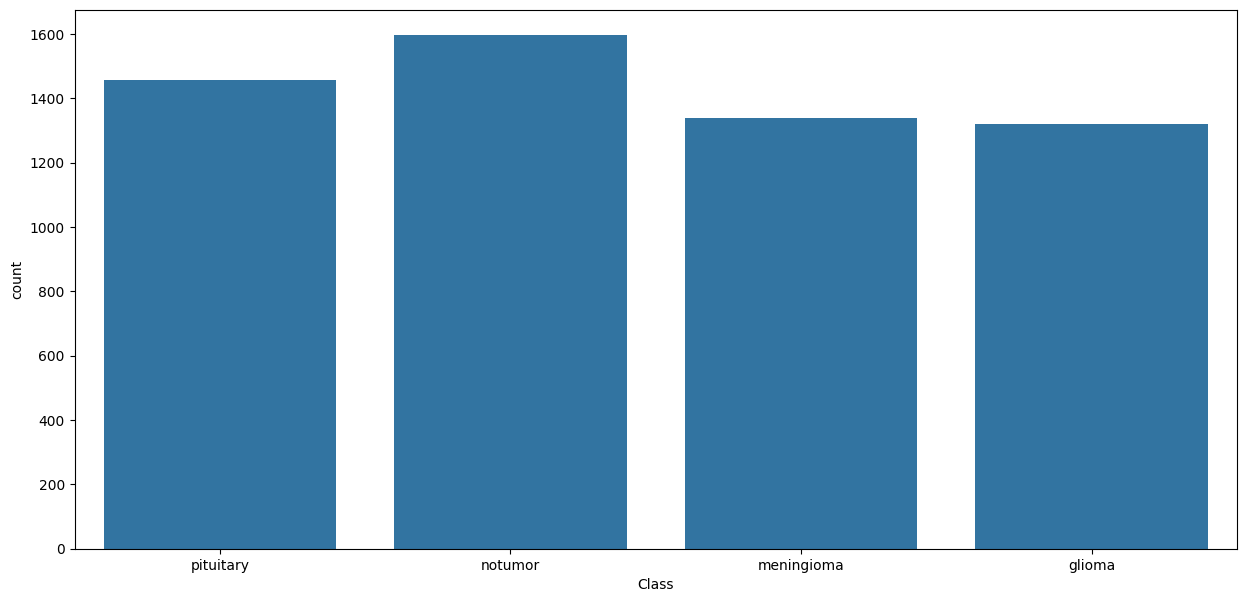

In [ ]:
# display count of images of each df
plt.figure(figsize=(15,7))
az = sns.countplot(data = tr_df, x = tr_df["Class"])

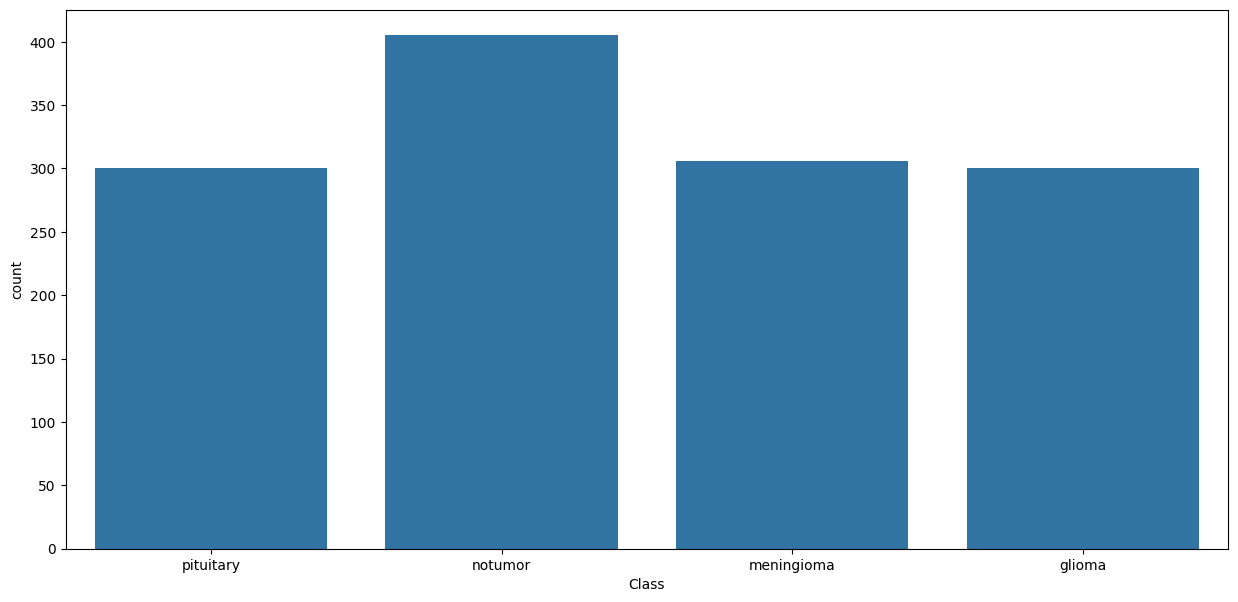

In [ ]:
plt.figure(figsize=(15,7))
az = sns.countplot(data = ts_df, x = ts_df["Class"])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# confusion matrix: shows correct and incorrect predictions
# classReport: shows accuracy, f1 score, recall, etc
import tensorflow as tf
# build model layer at a time
from tensorflow.keras.models import Sequential

# Dense: fully connected layer where all input nodes connected to outnode nodes
# Dropout: prevents overfitting by amking somedata None values
# converts image data to 1D tensor
from tensorflow.keras.layers import Dense, Dropout, Flatten

# Adamac: tunes model weights and learning rates
from tensorflow.keras.optimizers import Adamax


from tensorflow.keras.metrics import Precision, Recall

# generates bathces of image data to make random transformations
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Stratify: Maintain same proportion of each class label in training set and valid set
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df["Class"])


In [ ]:
valid_df

,Class Path,Class
313,/content/Testing/meningioma/Te-me_0104.jpg,meningioma
1047,/content/Testing/glioma/Te-gl_0102.jpg,glioma
172,/content/Testing/pituitary/Te-pi_0017.jpg,pituitary
0,/content/Testing/pituitary/Te-pi_0066.jpg,pituitary
1238,/content/Testing/glioma/Te-gl_0234.jpg,glioma
...,...,...
1007,/content/Testing/notumor/Te-no_0090.jpg,notumor
1034,/content/Testing/glioma/Te-gl_0031.jpg,glioma
372,/content/Testing/meningioma/Te-me_0179.jpg,meningioma
1295,/content/Testing/glioma/Te-gl_0240.jpg,glioma


In [ ]:
ts_df

,Class Path,Class
258,/content/Testing/pituitary/Te-pi_0268.jpg,pituitary
247,/content/Testing/pituitary/Te-pi_0048.jpg,pituitary
542,/content/Testing/meningioma/Te-me_0207.jpg,meningioma
703,/content/Testing/notumor/Te-no_0194.jpg,notumor
1236,/content/Testing/glioma/Te-gl_0062.jpg,glioma
...,...,...
102,/content/Testing/pituitary/Te-pi_0088.jpg,pituitary
37,/content/Testing/pituitary/Te-pi_0218.jpg,pituitary
868,/content/Testing/notumor/Te-no_0294.jpg,notumor
1173,/content/Testing/glioma/Te-gl_0253.jpg,glioma


In [ ]:
# Starting Pre process

# can change number (multiples of 2)
batch_size = 32

# enforce images to a strict size
img_size = (299,299)

# scale the imaes and adjust the brightness randomly
image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8,1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
# Prepare df to be fed to our model | helps load and process images on the fly
# so theyre not loaded at once.

# preps to right format and size so model can learn and makie predictions
tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
)

valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
)
ts_gen = ts_gen.flow_from_dataframe(
    ts_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=16,
    target_size=img_size,
    shuffle=False
)


Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


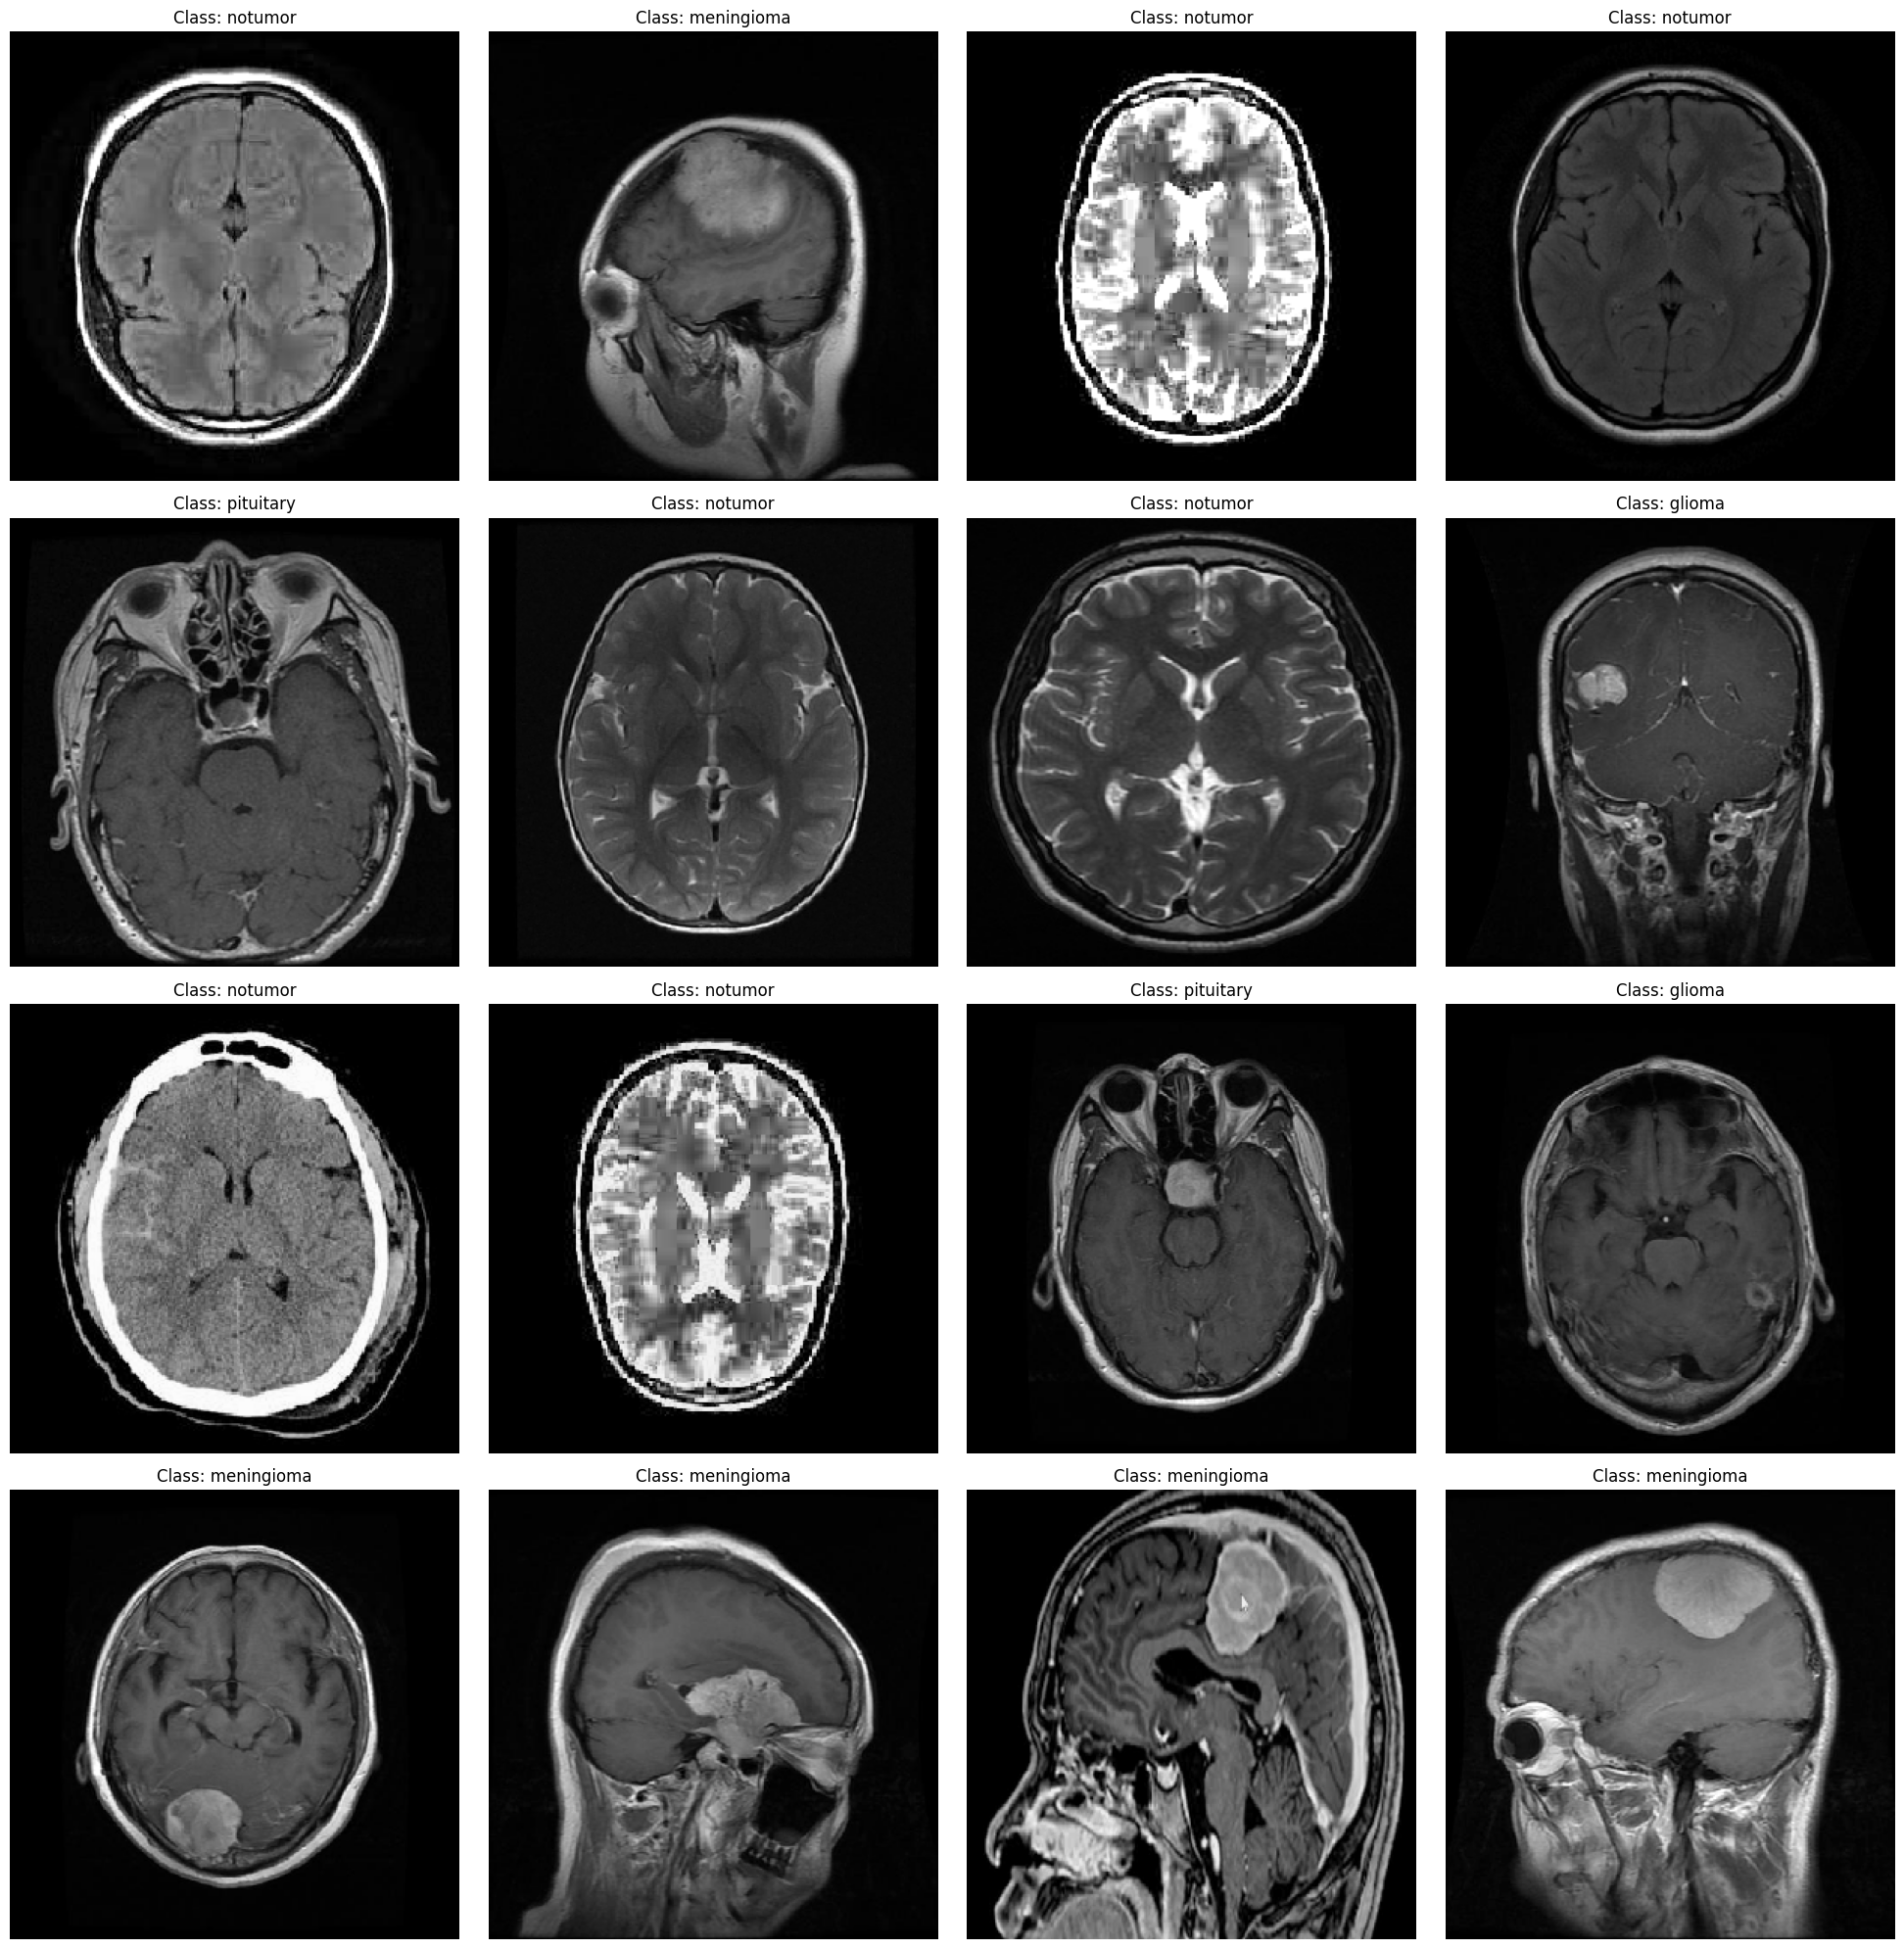

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(16):
    plt.subplot(4, 4, i+1)
    batch = next(tr_gen)
    image = batch[0][i]
    label = batch[1][i]

    # Get the class index
    class_index = np.argmax(label)

    # Get the list of class names and class indices
    class_names = list(tr_gen.class_indices.keys())
    class_indices = list(tr_gen.class_indices.values())

    # Find the index of the class_index in the list of indices
    index_position = class_indices.index(class_index)

    # Get the class name using the index position
    class_name = class_names[index_position]

    plt.imshow(image)
    plt.title(f"Class: {class_name}")
    plt.axis('off')
    plt.tight_layout()
plt.show()


In [ ]:
img_shape = (299,299,3)

base_model = tf.keras.applications.Xception(include_top=False, weights = "imagenet", input_shape=img_shape, pooling = "max")

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation="relu"),
    Dense(4, activation="softmax")

])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Adamax helps with making smaller steps each time on the gradient when closer to local min
# min loss function to make it closer to the actual output

model.compile(Adamax(learning_rate=0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy',
                         Precision(),
                         Recall()]
              )

In [ ]:
# train model goes through 5 passes of the training data adjusting weights and bias
hist = model.fit(tr_gen, epochs = 5, validation_data = valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 287s 1s/step - accuracy: 0.7829 - loss: 0.6179 - precision: 0.8532 - recall: 0.6937 - val_accuracy: 0.9603 - val_loss: 0.1038 - val_precision: 0.9616 - val_recall: 0.9557
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 222s 923ms/step - accuracy: 0.9814 - loss: 0.0579 - precision: 0.9817 - recall: 0.9810 - val_accuracy: 0.9679 - val_loss: 0.1228 - val_precision: 0.9709 - val_recall: 0.9679
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 160s 889ms/step - accuracy: 0.9935 - loss: 0.0261 - precision: 0.9937 - recall: 0.9933 - val_accuracy: 0.9924 - val_loss: 0.0271 - val_precision: 0.9924 - val_recall: 0.9924
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 203s 892ms/step - accuracy: 0.9962 - loss: 0.0121 - precision: 0.9963 - recall: 0.9962 - val_accuracy: 0.9985 - val_loss: 0.0054 - val_precision: 0.9985 - val_recall: 0.9985
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 202s 892ms/step - accuracy: 0.9947 - loss: 0.0135 - precision: 0.9947 - recall: 0.9947 - val_accuracy: 0.9939 - val_loss: 

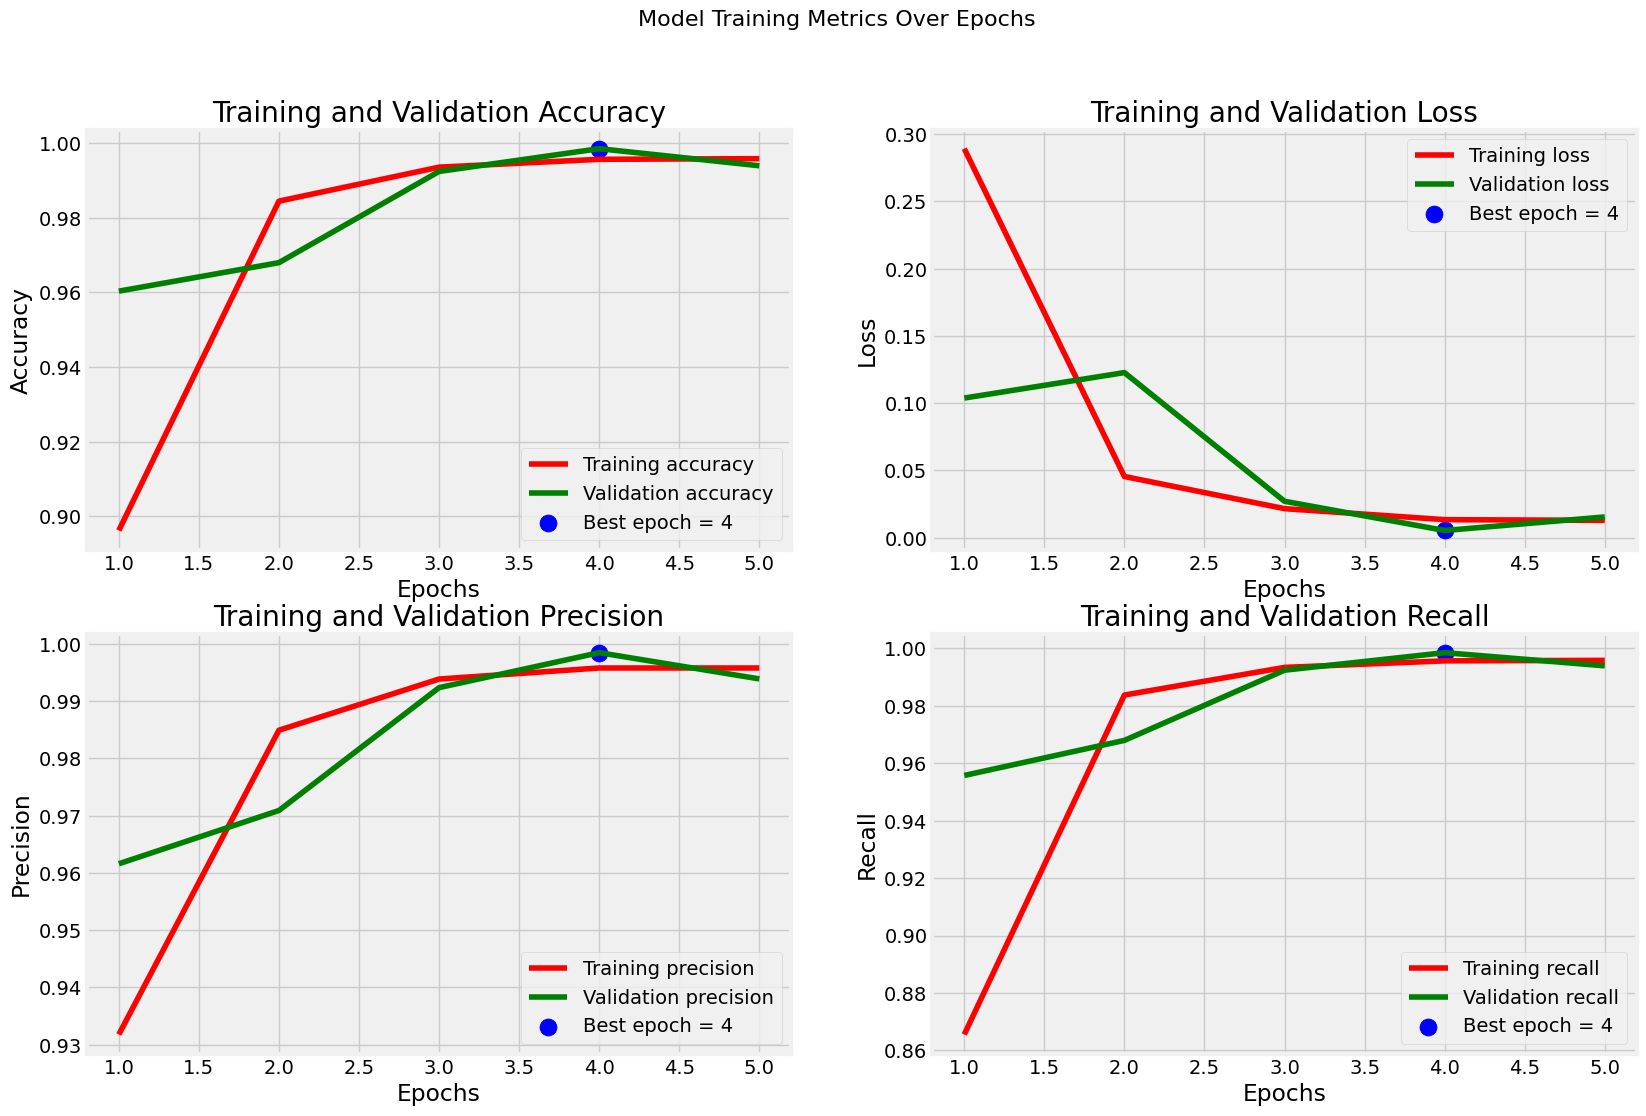

In [ ]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])  # For loss, we look for the minimum value
    else:
        idx = np.argmax(val_metrics[m])  # For other metrics, we look for the maximum value
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()


In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose = 1)
test_score = model.evaluate(ts_gen, verbose = 1)

print(f"Train Accuracy = {train_score[1] * 100:.2f}%")
print(f'Train Loss = {train_score[0]:.4f}')
print(f"\n\nValidation Accuracy = {valid_score[1] * 100:.2f}")
print(f"Validation loss = {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy = {test_score[1] * 100:.2f}")
print(f"Test loss = {test_score[0]:.4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 46s 258ms/step - accuracy: 0.9994 - loss: 0.0032 - precision: 0.9994 - recall: 0.9994
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 272ms/step - accuracy: 0.9941 - loss: 0.0113 - precision: 0.9941 - recall: 0.9941
 1/41 ━━━━━━━━━━━━━━━━━━━━ 8s 203ms/step - accuracy: 1.0000 - loss: 0.0044 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.9952 - loss: 0.0381 - precision: 0.9952 - recall: 0.9952
Train Accuracy = 99.98%
Train Loss = 0.0019


Validation Accuracy = 99.39
Validation loss = 0.0119


Test Accuracy = 99.70
Test loss = 0.0187


41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step


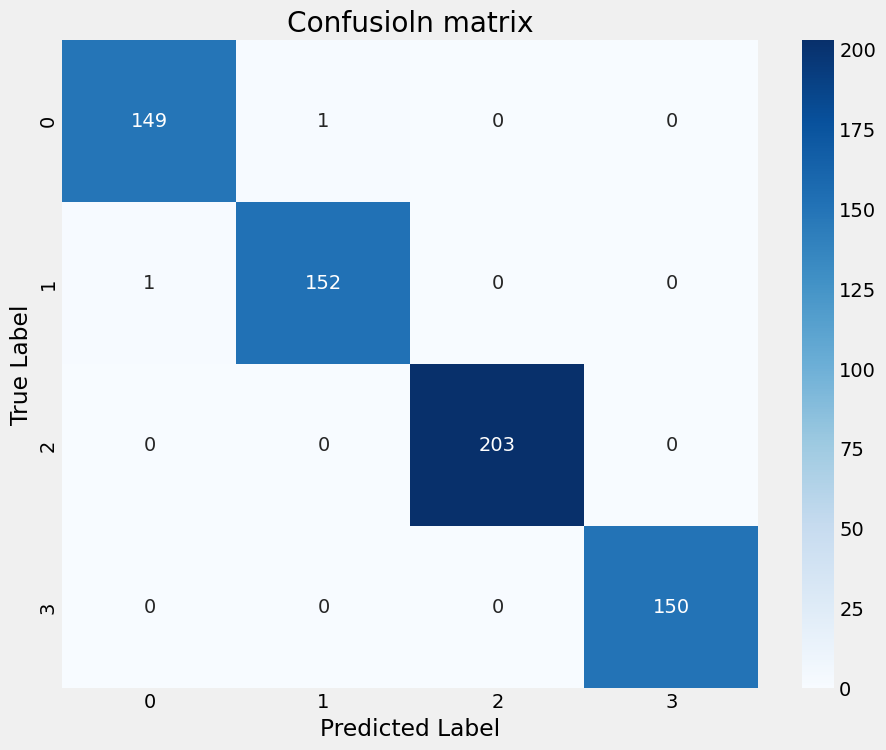

In [ ]:
# confusion matrix
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis = 1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# create and display confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize = (10,8))
sns.heatmap(cm, annot = True, fmt ='d', cmap = 'Blues', xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusioln matrix')
plt.show()

In [ ]:
# visualize prediction of model

from PIL import Image

def predict(img_path: str) -> None:
    # get class labels
    labels = list(class_dict.keys())

    # make figure
    plt.figure(figsize = (6,8))

    # load and preprocess images
    img = Image.open(img_path)
    resized_img = img.resize((299,299))
    img_array = np.asarray(resized_img)
    img_array = np.expand_dims(img_array, axis = 0) / 255.0

    # get model predicts
    predictions = model.predict(img_array)
    probabilities = list(predictions[0])

    # get predicted class
    predicted_class_idx = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_idx]

    # plot original image
    plt.subplot(2,1,1)
    plt.imshow(resized_img)
    plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

    # plot prediction probabilities
    plt.subplot(2,1,2)
    bars = plt.barh(labels, probabilities)
    plt.xlabel("Probability", fontsize = 45)
    plt.title("Class Probabilities")

    # Add probability labels to bars
    ax = plt.gca()
    ax.bar_label(bars, fmt = "%.2f")

    plt.tight_layout()
    plt.show()
    # print(f"Test loss = {test_score[0]:.4f}")
    print(f"\nPredicted Tumor Type {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


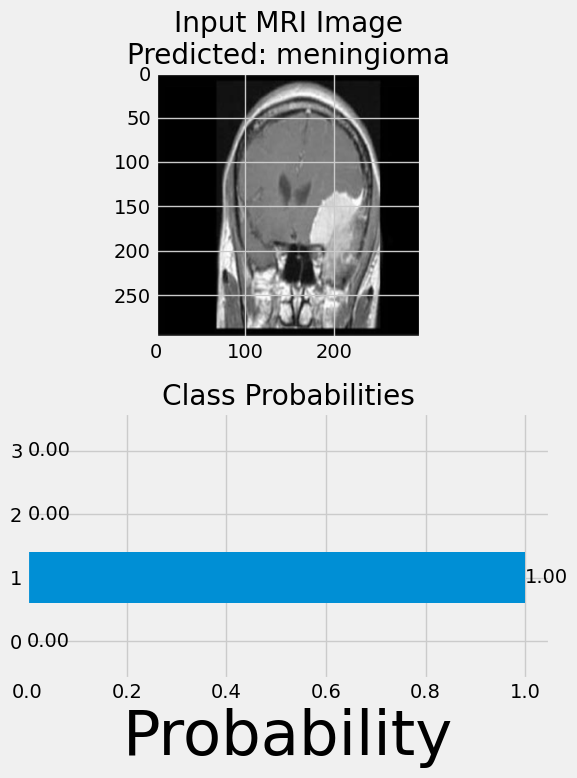


Predicted Tumor Type meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


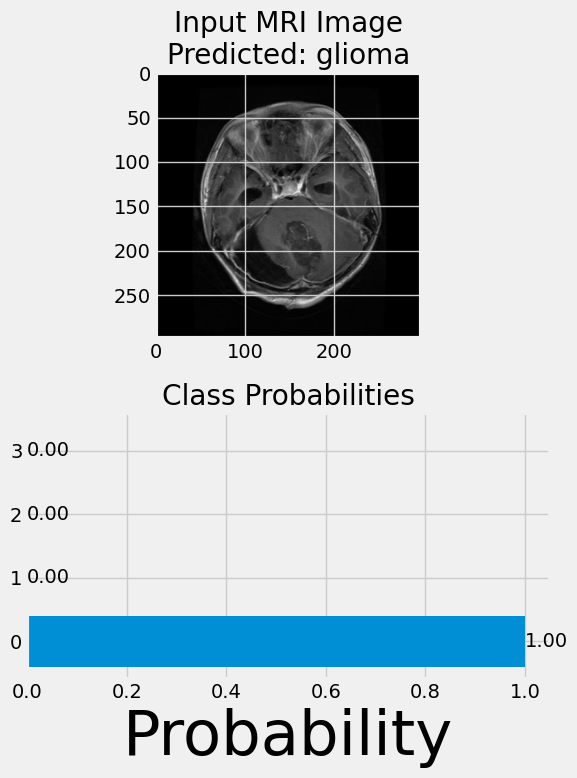


Predicted Tumor Type glioma


In [ ]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

In [ ]:
model.save_weights("xception_model.weights.h5")

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras import regularizers

In [ ]:
# Starting Pre process
# can change number (multiples of 2)
batch_size = 12

# enforce images to a strict size
img_size = (224,224)

# scale the imaes and adjust the brightness randomly
image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8,1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


# Prepare df to be fed to our model | helps load and process images on the fly
# so theyre not loaded at once.

# preps to right format and size so model can learn and makie predictions
tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
)

valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
)
ts_gen = ts_gen.flow_from_dataframe(
    ts_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=16,
    target_size=img_size,
    shuffle=False
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [ ]:
# Create a Sequential model
cnn_model = Sequential()

# Convolutional layers
cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

# Flatten the output for fully connected layers
cnn_model.add(Flatten())

# Fully connected layers
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.L2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax'))  # Output layer with 4 neurons for the 4 classes

# Compile the model
cnn_model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

# Display the model summary
cnn_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnn_model.fit(tr_gen, epochs = 5, validation_data=valid_gen)

In [ ]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision_2', 'recall_2']
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])  # For loss, we look for the minimum value
    else:
        idx = np.argmax(val_metrics[m])  # For other metrics, we look for the maximum value
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

KeyError: 'precision_2'

In [ ]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose = 1)
test_score = cnn_model.evaluate(ts_gen, verbose = 1)

print(f"Train Accuracy = {train_score[1] * 100:.2f}%")
print(f'Train Loss = {train_score[0]:.4f}')
print(f"\n\nValidation Accuracy = {valid_score[1] * 100:.2f}")
print(f"Validation loss = {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy = {test_score[1] * 100:.2f}")
print(f"Test loss = {test_score[0]:.4f}")

In [ ]:
# confusion matrix
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis = 1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# create and display confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize = (10,8))
sns.heatmap(cm, annot = True, fmt ='d', cmap = 'Blues', xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusioln matrix')
plt.show()

In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

In [ ]:
cnn_model.save("cnn_model.h5")

In [3]:
! pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 141.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.9 MB/s eta 0:00:00


In [4]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [5]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')
ngrok.set_auth_token(ngrok_token)

In [8]:

def run_streamlit():
    os.system("streamlit run /content/app.py --server.port 8501")

In [32]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import os
from dotenv import load_dotenv
load_dotenv()

genai.configure(api_key = os.getenv("GOOGLE_API_KEY"))

output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)

def generate_explanation(img_path, model_prediction, confidence):
    prompt = f"""You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan.
    The saliency map was generated by a deep learning model that was trained to classify brain tumors
    as either glioma, meningioma, pituitary, or no tumor.

    The saliency map highlights the regions of the image that the machine learning model is focusing on to make the prediction.

    The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}%.

    In your response:
    - Explain what regions of the brain the model is focusing on, based on the saliency map. Refer to the regions highlighted
      in light cyan, those are the regions where the model is focusing on.
    - Explain possible reasons why the model made the prediction it did.
    - Don't mention anything like 'The saliency map highlights the regions the model is focusing on, which are in light cyan'
      in your explanation.
    - Keep your explanation to 5 sentences max.

    """

    # passing in saliency map
    img = PIL.Image.open(img_path)

    model = genai.GenerativeModel(model_name="gemini-1.5-flash")
    response = model.generate_content([prompt, img])

    return response.text


def generate_saliency_map(model, img_array, class_index, img_size):
    with tf.GradientTape() as tape:
        img_tensor = tf.convert_to_tensor(img_array)
        tape.watch(img_tensor)
        predictions = model(img_tensor)
        target_class = predictions[:, class_index]

    gradients = tape.gradient(target_class, img_tensor)
    gradients = tf.math.abs(gradients)
    gradients = tf.reduce_max(gradients, axis=-1)
    gradients = gradients.numpy().squeeze()

    # Resize gradients to match original image size
    gradients = cv2.resize(gradients, img_size)

    # Create a circular mask for the brain area
    center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
    radius = min(center[0], center[1]) - 10
    y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
    mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2

    # Apply mask to gradients
    gradients = gradients * mask

    # Normalize only the brain area
    brain_gradients = gradients[mask]
    if brain_gradients.max() > brain_gradients.min():
        brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
    gradients[mask] = brain_gradients

    # Apply a higher threshold
    threshold = np.percentile(gradients[mask], 80)
    gradients[gradients < threshold] = 0

    # Apply more aggressive smoothing
    gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

    # Create a heatmap overlay with enhanced contrast
    heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)


    # Resize heatmap to match original image size
    heatmap = cv2.resize(heatmap, img_size)

    # Superimpose the heatmap on original image with increased opacity
    original_img = image.img_to_array(img)
    superimposed_img = heatmap * 0.7 + original_img * 0.3
    superimposed_img = superimposed_img.astype(np.uint8)

    img_path = os.path.join(output_dir, uploaded_file.name)
    with open(img_path, "wb") as f:
        f.write(uploaded_file.getbuffer())

    saliency_map_path = f'saliency_maps/{uploaded_file.name}'

    # Save the saliency map
    cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

    return superimposed_img



def load_xception_model(model_path):
    img_shape = (299, 299, 3)
    base_model = tf.keras.applications.Xception(include_top=False, weights='imagenet',
                                                input_shape=img_shape, pooling='max')

    model = Sequential([
        base_model,
        Flatten(),
        Dropout(rate=0.3),
        Dense(128, activation='relu'),
        Dropout(rate=0.25),
        Dense(4, activation='softmax')
    ])

    # have model accept image size
    model.build((None,) + img_shape)

    # Compile the model
    model.compile(optimizer=Adamax(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy', Precision(), Recall()])

    model.load_weights(model_path)

    return model


st.title("Brain Tumor Classifier")
st.write('Upload image of a brain MRI scan to classify')

uploaded_file = st.file_uploader("Choose an image...", type = ["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # have user let them choose model
    selected_model = st.radio(
        "Select Model",
        ("Transfer Learning - Xception", "Custom CNN")
    )

    if selected_model == "Transfer Learning - Xception":
        model = load_xception_model('/content/xception_model.weights.h5')
        img_size = (299,299)
    else:
        model = load_model('/content/cnn_model.h5')
        img_size = (224,224)

    labels = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']
    img = image.load_img(uploaded_file, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)

    # Get the class with the highest probability
    class_index = np.argmax(prediction[0])
    result = labels[class_index]

    st.write(f"Predicted Class: {result}")
    st.write("Predictions:")
    for label, prob in zip(labels, prediction[0]):
        st.write(f"{label}: {prob:.4f}")

    saliency_map = generate_saliency_map(model, img_array, class_index, img_size)
    col1, col2 = st.columns(2)

    with col1:
        st.image(uploaded_file, caption='Uploaded Image', use_container_width = True)
    with col2:
        st.image(saliency_map, caption='Saliency Map', use_container_width = True)


    st.write("## Classification Results")

    result_container = st.container()
    result_container = st.container()
    result_container.markdown(
        f"""
        <div style="background-color: #000000; color: #ffffff; padding: 30px; border-radius: 15px;">
            <div style="display: flex; justify-content: space-between; align-items: center;">
                <div style="flex: 1; text-align: center;">
                    <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Prediction</h3>
                    <p style="font-size: 36px; font-weight: 800; color: #FF0000; margin: 0;">
                        {result}
                    </p>
                </div>
                <div style="width: 2px; height: 80px; background-color: #ffffff; margin: 0 20px;"></div>
                <div style="flex: 1; text-align: center;">
                    <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Confidence</h3>
                    <p style="font-size: 36px; font-weight: 800; color: #2196F3; margin: 0;">
                        {prediction[0][class_index]:.4%}
                    </p>
                </div>
            </div>
        </div>
        """,
        unsafe_allow_html=True
    )


    # # Prepare data for Plotly chart
    # probabilities = prediction[0]
    # sorted_indices = np.argsort(probabilities)[::-1]
    # sorted_labels = [labels[i] for i in sorted_indices]
    # sorted_probabilities = probabilities[sorted_indices]

    # # Create a Plotly bar chart
    # fig = go.Figure(go.Bar(
    #     x=sorted_probabilities,
    #     y=sorted_labels,
    #     orientation='h',
    #     marker_color=['red' if label == result else 'blue' for label in sorted_labels]
    # ))

    # Prepare data for Plotly chart
    probabilities = prediction[0]
    sorted_indices = np.argsort(probabilities)[::-1]
    sorted_labels = [labels[i] for i in sorted_indices]
    sorted_probabilities = probabilities[sorted_indices]

    # Create a Plotly bar chart
    fig = go.Figure(go.Bar(
        x=sorted_probabilities,
        y=sorted_labels,
        orientation='h',
        marker_color=['red' if label == result else 'blue' for label in sorted_labels]
    ))

    # Customize the chart layout
    fig.update_layout(
        title='Probabilities for each class',
        xaxis_title='Probability',
        yaxis_title='Class',
        height=400,
        width=600,
        yaxis=dict(autorange='reversed')
    )

    # Add value labels to the bars
    for i, prob in enumerate(sorted_probabilities):
        fig.add_annotation(
            x=prob,
            y=sorted_labels[i],
            text=f'{prob:.4f}',
            showarrow=False,
            xanchor='left',
            xshift=5
        )

    # Display the Plotly chart
    st.plotly_chart(fig)



    saliency_map_path = f'saliency_maps/{uploaded_file.name}'
    explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])

    st.write('## Explanation')
    st.write(explanation)

Overwriting app.py


In [26]:
thread = Thread(target = run_streamlit)
thread.start()

In [33]:
public_url = ngrok.connect(addr = '8501', proto='http', bind_tls = True)
print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://8fca-35-245-11-103.ngrok-free.app" -> "http://localhost:8501"


In [29]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
  ngrok.disconnect(tunnel.public_url)

In [31]:
%%writefile .env
GOOGLE_API_KEY = "GENAI_API_KEY"

Overwriting .env
